In [1]:
#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [2]:
#顯示圖形的函數，可先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [3]:
# 把兩個訓練資料集和測試資料集讀進來
#Q1: 判斷測試資料集和訓練資料集欄位變數是否有差異性?
#測試資料集的欄位變數少了"survived"變數
df_train = pd.read_csv("Titanic_train.csv")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_test = pd.read_csv("Titanic_test.csv")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
#開始探索性分析(EDA)
#觀察資料是否有遺失值
#判斷每一個資料點，是否為空值:
print(df_test.isnull().head(5))


# 会判断哪些”列”存在缺失值
# any：判斷一個tuple或者list是否全為空，0，False。如果全為空，0，False，則返回False；如果不全為空，則返回True。
print(df_test.isnull().any())

# 統計 data 裡有空值的變數個數
print(df_test.isnull().any().sum())
#Q2: 測試資料集是否有遺失值?
#"Age"及"Cabin"及"Fare"欄位有遺失值

   PassengerId  Pclass   Name    Sex    Age  SibSp  Parch  Ticket   Fare  \
0        False   False  False  False  False  False  False   False  False   
1        False   False  False  False  False  False  False   False  False   
2        False   False  False  False  False  False  False   False  False   
3        False   False  False  False  False  False  False   False  False   
4        False   False  False  False  False  False  False   False  False   

   Cabin  Embarked  
0   True     False  
1   True     False  
2   True     False  
3   True     False  
4   True     False  
PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool
3


In [6]:
#Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，
#你覺得以這個變數而言，試著說明每一個方法的差異。

#合併資料
df_titanic = pd.concat([df_train,df_test],axis=0)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [7]:
#開始探索性分析(EDA)
#觀察資料是否有重覆
#產生一個不重覆的資料集，透過 drop_duplicates 函數
nodup_df_titanic=df_titanic.drop_duplicates(subset=None, keep='first', inplace=False)

if nodup_df_titanic.shape[1]==df_titanic.shape[1]:
 print("no duplicates")

no duplicates


In [8]:
#顯示有重覆的資訊:
df_titanic.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 1309, dtype: bool

In [9]:
#開始探索性分析(EDA)
#觀察資料是否有遺失值
#判斷每一個資料點，是否為空值:
print(df_titanic.isnull().head(5))


# 会判断哪些”列”存在缺失值
# any：判斷一個tuple或者list是否全為空，0，False。如果全為空，0，False，則返回False；如果不全為空，則返回True。
print(df_titanic.isnull().any())

# 統計 data 裡有空值的變數個數
print(df_titanic.isnull().any().sum())

   PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0        False     False   False  False  False  False  False  False   False   
1        False     False   False  False  False  False  False  False   False   
2        False     False   False  False  False  False  False  False   False   
3        False     False   False  False  False  False  False  False   False   
4        False     False   False  False  False  False  False  False   False   

    Fare  Cabin  Embarked  
0  False   True     False  
1  False  False     False  
2  False   True     False  
3  False  False     False  
4  False   True     False  
PassengerId    False
Survived        True
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool
5


In [10]:
# 當有些資料用 "null" 代表空值時，需要先做轉換，
df_titanic= df_titanic.replace('null',np.NaN)
# 統計 data 裡每一列是否有空值
print(df_titanic.isnull().any())

# 統計 data 裡有空值的變數個數
print(df_titanic.isnull().any().sum())

PassengerId    False
Survived        True
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool
5


In [11]:
#將讀取結果輸出成.xlsx檔案
df_titanic.to_csv('titanic.csv' )

29.881137667304014
14.413493211271334


D:\YUFEN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


23.87751718869366
17.590844644704124


D:\YUFEN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


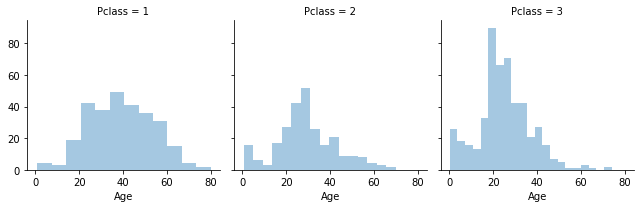

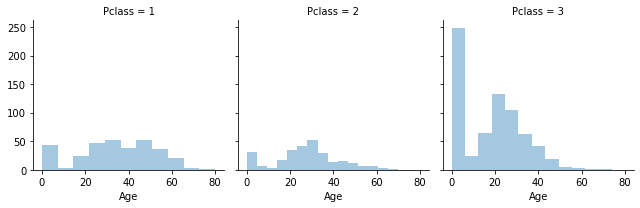

In [12]:
# 我們以  Age 進行補植，補0
#補值前 平均值
df_titanic = pd.read_csv("titanic.csv")
print(df_titanic['Age'].mean()) #Age平均
print(df_titanic['Age'].std()) #Age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(df_titanic, col='Pclass')
g.map(sns.distplot, 'Age', kde=False)

#補值後
df_titanic['Age']=df_titanic['Age'].fillna(0)
print(df_titanic['Age'].mean())
print(df_titanic['Age'].std()) #Age標準差
df_titanic[df_titanic['Age'].isnull().values==True]
#補完0就沒有遺失值了，但是看到這樣的補值效果，平均值上有很明顯的差異，
# 連續型用分布圖行來看
g = sns.FacetGrid(df_titanic, col='Pclass')
g.map(sns.distplot, 'Age', kde=False)
#可以看出三等艙的年齡遺失比率高
#用0 來補不是一個好的策略

29.881137667304014
14.413493211271334


D:\YUFEN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


29.881137667303985
12.883193243702001


D:\YUFEN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


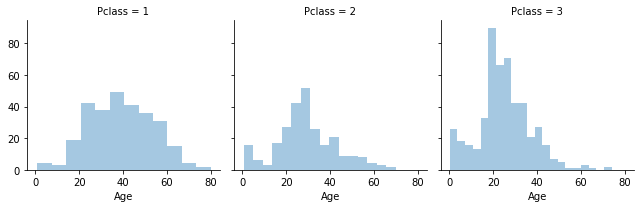

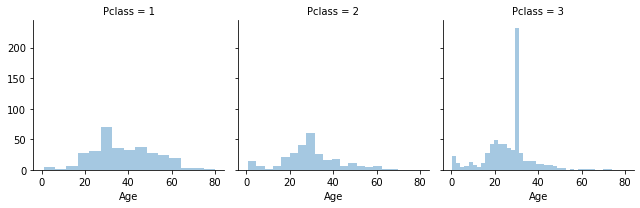

In [13]:
# 我們以  Age 進行補植，補平均數
#補值前 平均值
df_titanic = pd.read_csv("titanic.csv")
print(df_titanic['Age'].mean()) #Age平均
print(df_titanic['Age'].std()) #Age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(df_titanic, col='Pclass')
g.map(sns.distplot, 'Age', kde=False)

#補值(補平均數)後
df_titanic['Age']=df_titanic['Age'].fillna(df_titanic['Age'].mean())
print(df_titanic['Age'].mean())
print(df_titanic['Age'].std()) #Age標準差
df_titanic[df_titanic['Age'].isnull().values==True]
#補平均數，平均數上沒有差異性，標準差接近
# 連續型用分布圖行來看
g = sns.FacetGrid(df_titanic, col='Pclass')
g.map(sns.distplot, 'Age', kde=False)
##圖形中高點的位置，就是平均數的位置(遺失值大部分在三等艙)

29.881137667304014
14.413493211271334


D:\YUFEN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


29.88771996939556
14.48476368019123


D:\YUFEN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


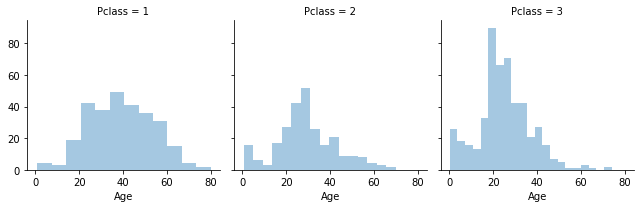

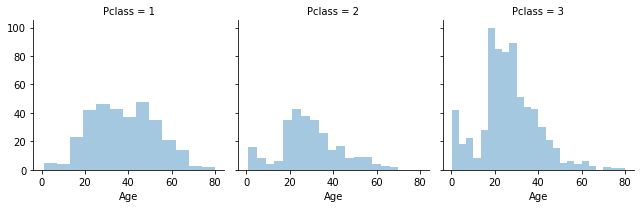

In [14]:
# 我們以  Age 進行補植，由前往後補
#補值前 平均值
df_titanic = pd.read_csv("titanic.csv")
print(df_titanic['Age'].mean()) #Age平均
print(df_titanic['Age'].std()) #Age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(df_titanic, col='Pclass')
g.map(sns.distplot, 'Age', kde=False)

#補值後
df_titanic['Age']=df_titanic['Age'].fillna(method='bfill')
print(df_titanic['Age'].mean())
print(df_titanic['Age'].std()) #Age標準差
df_titanic[df_titanic['Age'].isnull().values==True]
# 連續型用分布圖行來看
g = sns.FacetGrid(df_titanic, col='Pclass')
g.map(sns.distplot, 'Age', kde=False)
#由前往後補
#比較平均，不像前兩個方法，集中在某一些值上面。

29.881137667304014
14.413493211271334


D:\YUFEN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


29.75509549274255
14.347469886198386


D:\YUFEN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


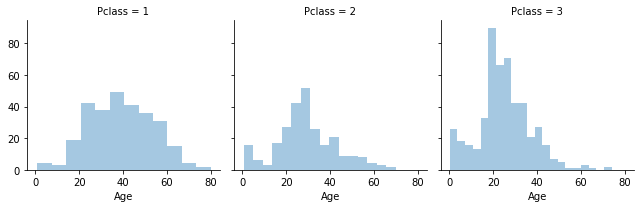

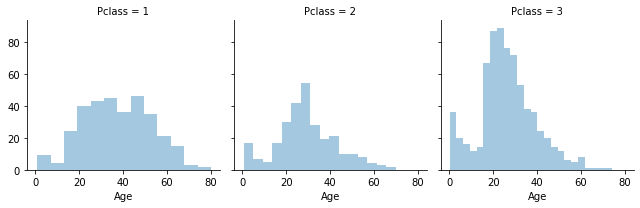

In [15]:
# 我們以  Age 進行補植，由後往前補
#補值前 平均值
df_titanic = pd.read_csv("titanic.csv")
print(df_titanic['Age'].mean()) #Age平均
print(df_titanic['Age'].std()) #Age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(df_titanic, col='Pclass')
g.map(sns.distplot, 'Age', kde=False)

#補值後
df_titanic['Age']=df_titanic['Age'].fillna(method='pad')
print(df_titanic['Age'].mean())
print(df_titanic['Age'].std()) #Age標準差
df_titanic[df_titanic['Age'].isnull().values==True]
# 連續型用分布圖行來看
g = sns.FacetGrid(df_titanic, col='Pclass')
g.map(sns.distplot, 'Age', kde=False)
#由後往前補
#比較平均，不像前兩個方法，集中在某一些值上面。